# **Data_ETL**

## Objectives

* Extract, transform and load data ready for analysis

## Inputs

* Students' Academic Performance Dataset from Kaggle (see README for details)
* A copy of the file is saved in https://github.com/8osco/academic_performance_analysis/blob/main/data/inputs/raw/xAPI-Edu-Data.csv

## Outputs

* Cleaned data for use in analysis and visualisation, which are to be performed in the following Jupyter notebook files

# 1 Import packages


Import relevant packages required for data analysis and visualisation.

In [1]:
# Import NumPy, Pandas, Matplotlib, Seaborn and Plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2 Data extract and familiarisation

Read in csv file and familiarise with the file structure at a high level, through use of various dataframe methods:

In [2]:
# Load the dataset and display the first few rows
df = pd.read_csv('../data/inputs/raw/xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
# Display the shape of the DataFrame
df.shape

(480, 17)

In [4]:
# Display the column data types and check for null or missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
# Display basic statistics of the DataFrame
# including mean, standard deviation, minimum, maximum and percentiles for the numerical columns
# and unique counts for categorical columns
df.describe(include = 'all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


### Observations:
- There are 480 rows of student records and 17 data columns.

- There is no missing data in each of the columns.

- 4 of the columns use numerical values, and integers more specifically.  The rest of the columns use categorical values.

- Column headings have mixed use of capital letters and some headings can be more descriptive.  Best practice is to use lowercase or snake case.

### Follow up actions:

- Familiarise with data format and check for potential typos or duplicates within each categorical column.

- Create charts to help visualise distribution of values under each numerical column.

- Add column headings to the list for data cleaning.

# 3 Categorical columns drilldown

Familiarise with data format and check for potential typos or duplicates within each categorical column.

In [6]:
# Check for unique values in the gender column
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [7]:
# Check for unique values in the NationalITy column
df['NationalITy'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

Observation and code enhancement:

There are 14 columns and it would be quite time consuming to run the above uniqueness check individually.  A For Loop is added below to automate the process.

In [8]:
# Filter only categorical columns
categorical_columns = df.select_dtypes(include='object')

# Loop through and print unique values for each object column
for col in categorical_columns.columns:
    print(f"Categorical Column: {col}")
    print(df[col].unique())
    print('-' * 30)

Categorical Column: gender
['M' 'F']
------------------------------
Categorical Column: NationalITy
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
------------------------------
Categorical Column: PlaceofBirth
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
------------------------------
Categorical Column: StageID
['lowerlevel' 'MiddleSchool' 'HighSchool']
------------------------------
Categorical Column: GradeID
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
------------------------------
Categorical Column: SectionID
['A' 'B' 'C']
------------------------------
Categorical Column: Topic
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
------------------------------
Categorical Column: Semester
['F' 'S']
------------------------------
C

In [9]:
# Check for duplicated records
df.duplicated().sum()

2

There are 2 duplicated records identified.

In [10]:
# Display duplicated records
df[df.duplicated(keep = False)]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
322,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Father,10,15,10,21,No,Bad,Above-7,L
323,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Father,30,10,20,5,No,Bad,Above-7,L
326,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Father,10,15,10,21,No,Bad,Above-7,L
327,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Father,30,10,20,5,No,Bad,Above-7,L


Rows 322 and 326 are identical in every column, and without additional information, there is a good chance that one of them was duplicated.  Same applies to rows 323 and 327.

### Observations:

Whilst the columns individually have genuinely unique values, there are two duplicated records identified based on the information available.

Some areas for considerations in the data cleaning exercise:

- Remove duplicated records to prevent bias in the analysis.
- KW and KuwaIT were used in different columns representing the same country.
- Data entries can be more descriptive for the purpose of executive dashboard, e.g. full words 'male' and 'female' instead of 'M' and 'F'.
- Manual encoding for some categorical columns could be helpful e.g. for ordering purposes - GradeID from lowest to highest.  
- Other forms of encoding, e.g. one hot encoding could be necessary for machine learning exercise.
- Students' marks were grouped into 3 classes: L, M, H.  These will need to be re-classed into Pass/Fail category to meet the business requirements.
- Lower cases are preferred for all categorical data entries as best practice.

### Decisions and Actions:

- Convert to lowercase where possible for categorical data entries, and align between different columns, e.g. KuwaIT vs KW.
- Consider feature selection, i.e. reduction in number of columns used for prediction modelling, as part of the exploratory data analysis.
- Use feature engineering to change groupings of student's marks from 3 into 2, i.e. Pass/Fail categories.
- Getting the data format and structure ready for dashboard is considered as higher priority than for machine learning at this point of the project.  This is partly because automatic encoding may be available from e.g. Scikit-learn machine learning pipelines.  We will enhance data descriptiveness and add order to the categorical values as part of the data cleaning exercise.

# 4 Numerical columns drilldown

Create charts to help visualise the distribution of values in each numerical column.

Recap: the 4 numerical columns are:

- raisedhands

- VisITedResources

- AnnouncementsView

- Discussion

We will use boxplot in the Matplotlib library for the visualisation.  Boxplot is chosen for the ease of comparison amongst the columns regarding the spread of data and possible outliers.  Matplotlib is chosen for its simplicity and for quick visualisation for own use primarily.

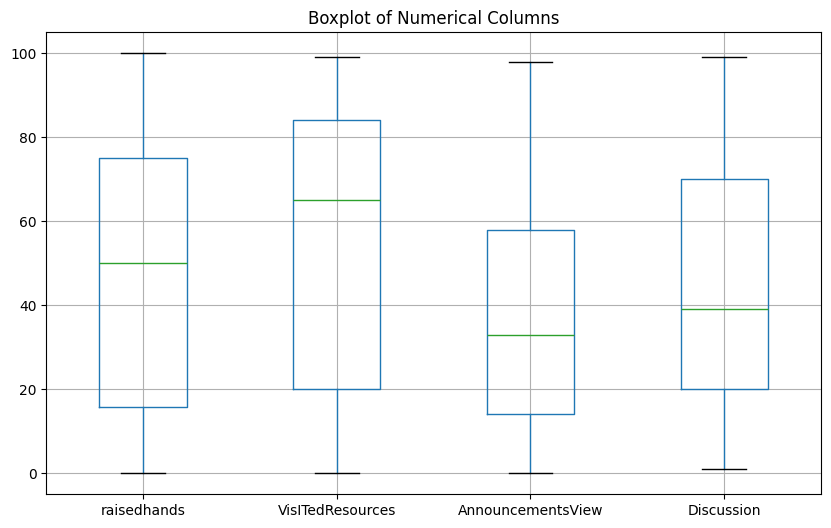

In [11]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64'])

# Plot boxplots for all numerical columns
plt.figure(figsize=(10, 6))     # Adjust the figure size for legibility
numerical_cols.boxplot()        # This employs Pandas method which provides side-by-side comparison of the chosen boxplots
plt.title("Boxplot of Numerical Columns")
plt.show()

### Observations:

There are no visible outliers in the boxplots, and they all have similar value range, between 0 and 100.

Neither treatment for outliers nor normalisation is deemed necessary.

# 5 Data cleaning

There were 5 data cleaning actions identified above, which we will proceed in this section:

Action 1 - Remove the 2 duplicated records

In [12]:
df_dup_remove = df.drop_duplicates() # Remove duplicated records and create a new DataFrame
df_dup_remove.shape # Check the shape and particularly number of remaining rows

(478, 17)

In [13]:
df_dup_remove.duplicated().sum() # Check if any duplicates remain

0

In [14]:
df_dup_remove.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


Action 2 - Convert column headings to lowercase and make them more descriptive

In [15]:
# Create a mapping of existing names to more descriptive lowercase names for selected columns
selected_rename_map = {
    "NationalITy": "nationality",
    "PlaceofBirth": "place_of_birth",
    "StageID": "education_stage",
    "GradeID": "grade",
    "SectionID": "classroom_id",
    "Topic": "subject",
    "Semester": "semester",
    "Relation": "parent_involved",
    "raisedhands": "raised_hands",
    "VisITedResources": "resource_visits",
    "AnnouncementsView": "announcements_viewed",
    "Discussion": "discussion_participation",
    "ParentAnsweringSurvey": "parent_answered_survey",
    "ParentschoolSatisfaction": "parent_school_satisfaction",
    "StudentAbsenceDays": "absence_category",
    "Class": "pass_fail_status"
}

# Create a new DataFrame with renamed columns
df_renamed = df_dup_remove.rename(columns=selected_rename_map)

# Check the renamed DataFrame and display the first few rows
df_renamed.head()


,gender,nationality,place_of_birth,education_stage,grade,classroom_id,subject,semester,parent_involved,raised_hands,resource_visits,announcements_viewed,discussion_participation,parent_answered_survey,parent_school_satisfaction,absence_category,pass_fail_status
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


Action 3 - Convert to lowercase where possible for categorical data entries, and align values between different columns, e.g. KuwaIT vs KW

In [16]:
# Create a copy of the DataFrame for safety and to avoid modifying the original DataFrame
df_lowercase = df_renamed.copy()

# Filter only categorical columns
cat_columns = df_lowercase.select_dtypes(include='object')

# Convert all categorical columns to lowercase and strip whitespace
for col in cat_columns.columns:
    df_lowercase[col] = df_lowercase[col].str.lower().str.strip()

# Convert KW to Kuwait in the nationality column for consistency 
df_lowercase['nationality'] = df_lowercase['nationality'].replace({'kw':'kuwait'})

# Loop through and print unique values for each object column to check the changes:
for col in cat_columns.columns:
    print(f"Categorical Column: {col}")
    print(df_lowercase[col].unique())
    print('-' * 30)


Categorical Column: gender
['m' 'f']
------------------------------
Categorical Column: nationality
['kuwait' 'lebanon' 'egypt' 'saudiarabia' 'usa' 'jordan' 'venzuela' 'iran'
 'tunis' 'morocco' 'syria' 'palestine' 'iraq' 'lybia']
------------------------------
Categorical Column: place_of_birth
['kuwait' 'lebanon' 'egypt' 'saudiarabia' 'usa' 'jordan' 'venzuela' 'iran'
 'tunis' 'morocco' 'syria' 'iraq' 'palestine' 'lybia']
------------------------------
Categorical Column: education_stage
['lowerlevel' 'middleschool' 'highschool']
------------------------------
Categorical Column: grade
['g-04' 'g-07' 'g-08' 'g-06' 'g-05' 'g-09' 'g-12' 'g-11' 'g-10' 'g-02']
------------------------------
Categorical Column: classroom_id
['a' 'b' 'c']
------------------------------
Categorical Column: subject
['it' 'math' 'arabic' 'science' 'english' 'quran' 'spanish' 'french'
 'history' 'biology' 'chemistry' 'geology']
------------------------------
Categorical Column: semester
['f' 's']
---------------

Action 4 - Use feature engineering to change the grouping of students' marks from 3 into 2 categories, i.e. Pass/Fail

For this project, we assume a Pass is either Middle (M) or High (H) level in the Class column.

In [17]:
# Create a copy of the DataFrame for safety and to avoid modifying the original DataFrame
df_passgroup = df_lowercase.copy()

# Define mapping as per assumption above
pass_fail_map = {
    "l": "fail",
    "m": "pass",
    "h": "pass"
}

# Apply mapping
df_passgroup["pass_fail_status"] = df_passgroup["pass_fail_status"].map(pass_fail_map)

# Check and compare if mapping was applied correctly
print("After Mapping:\n", df_passgroup["pass_fail_status"].value_counts())
print("\nOriginal Values:\n", df_lowercase["pass_fail_status"].value_counts())

After Mapping:
 pass_fail_status
pass    353
fail    125
Name: count, dtype: int64

Original Values:
 pass_fail_status
m    211
h    142
l    125
Name: count, dtype: int64


Action 5 - Enhance data descriptiveness and add order to the categorical values for selected columns

Ordinal encoding is a common approach for ordering categorical values.  However, the values would all be converted into numbers.  Our objective here is to keep the 'modified' categorical values and impose order.  Research suggests that Pandas' CategoricalDType can help and this is experimented with below.

In [18]:
# Import CategoricalDtype from pandas.api.types for ordered categorical data
from pandas.api.types import CategoricalDtype

# Create a copy of the DataFrame for safety and to avoid modifying the original DataFrame
df_ordered = df_passgroup.copy()

# Enhance data descriptiveness on selected columns
value_replacements = {
    "gender": {"m": "male", "f": "female"},
    "education_stage": {"lowerlevel": "lowerschool", "middlelevel": "middleschool", "highlevel": "highschool"}, # standardise values
    "semester": {"f": "first", "s": "second"},
    "absence_category": {"under-7": "low", "above-7": "high"} # change description to low/high categories, removing the reference to the number of days
}

for col, mapping in value_replacements.items():
    df_ordered[col] = df_ordered[col].replace(mapping)

# Define ordered categories
ordered_categories = {
    "gender": ["female", "male"],
    "education_stage": ["lowerschool", "middleschool", "highschool"],
    "grade": [
        "g-01", "g-02", "g-03", "g-04", "g-05", "g-06",
        "g-07", "g-08", "g-09", "g-10", "g-11", "g-12"
    ],
    "classroom_id": ["a", "b", "c"],
    "semester": ["first", "second"],
    "parent_involved": ["father", "mother"],
    "parent_answered_survey": ["no", "yes"],
    "parent_school_satisfaction": ["bad", "good"],
    "absence_category": ["low", "high"],
    "pass_fail_status": ["pass", "fail"]
}

# Convert to ordered categorical
for col, categories in ordered_categories.items():
    cat_type = CategoricalDtype(categories=categories, ordered=True)
    df_ordered[col] = df_ordered[col].astype(cat_type)

# subject, nationality and place_of_birth are ordered alphabetically
for col in ["subject", "nationality", "place_of_birth"]:
    ordered_alph = sorted(df_ordered[col].unique())
    df_ordered[col] = df_ordered[col].astype(CategoricalDtype(categories=ordered_alph, ordered=True))

# Display the first few rows of the ordered DataFrame to verify the changes
df_ordered.head()

,gender,nationality,place_of_birth,education_stage,grade,classroom_id,subject,semester,parent_involved,raised_hands,resource_visits,announcements_viewed,discussion_participation,parent_answered_survey,parent_school_satisfaction,absence_category,pass_fail_status
0,male,kuwait,kuwait,lowerschool,g-04,a,it,first,father,15,16,2,20,yes,good,low,pass
1,male,kuwait,kuwait,lowerschool,g-04,a,it,first,father,20,20,3,25,yes,good,low,pass
2,male,kuwait,kuwait,lowerschool,g-04,a,it,first,father,10,7,0,30,no,bad,high,fail
3,male,kuwait,kuwait,lowerschool,g-04,a,it,first,father,30,25,5,35,no,bad,high,fail
4,male,kuwait,kuwait,lowerschool,g-04,a,it,first,father,40,50,12,50,no,bad,high,pass


Here we perform completeness and ordering spot checks:

In [19]:
df_ordered.isna().sum() # Check for null values in the DataFrame

gender                          0
nationality                     0
place_of_birth                  0
education_stage                 0
grade                           0
classroom_id                    0
subject                         0
semester                        0
parent_involved               197
raised_hands                    0
resource_visits                 0
announcements_viewed            0
discussion_participation        0
parent_answered_survey          0
parent_school_satisfaction      0
absence_category                0
pass_fail_status                0
dtype: int64

There are null values observed in the transformed parent_involved column, prompting further investigation.

In [20]:
df_ordered["parent_involved"].unique() # Check for unique values in the parent_involved column

['father', NaN]
Categories (2, object): ['father' < 'mother']

Reviewing the code and outputs above show that whilst 'mum' was in the original data, the categorical data ordering code uses 'mother'.  This is to be corrected and re-checked below. 

In [21]:
# Import CategoricalDtype from pandas.api.types for ordered categorical data
from pandas.api.types import CategoricalDtype

# Create a copy of the DataFrame for safety and to avoid modifying the original DataFrame
df_ordered = df_passgroup.copy()

# Enhance data descriptiveness on selected columns
value_replacements = {
    "gender": {"m": "male", "f": "female"},
    "education_stage": {"lowerlevel": "lowerschool", "middlelevel": "middleschool", "highlevel": "highschool"}, # standardise values
    "semester": {"f": "first", "s": "second"},
    "absence_category": {"under-7": "low", "above-7": "high"} # change description to low/high categories, removing the reference to the number of days
}

for col, mapping in value_replacements.items():
    df_ordered[col] = df_ordered[col].replace(mapping)

# Define ordered categories
ordered_categories = {
    "gender": ["female", "male"],
    "education_stage": ["lowerschool", "middleschool", "highschool"],
    "grade": [
        "g-01", "g-02", "g-03", "g-04", "g-05", "g-06",
        "g-07", "g-08", "g-09", "g-10", "g-11", "g-12"
    ],
    "classroom_id": ["a", "b", "c"],
    "semester": ["first", "second"],
    "parent_involved": ["father", "mum"], # corrected from 'mother' to 'mum'
    "parent_answered_survey": ["no", "yes"],
    "parent_school_satisfaction": ["bad", "good"],
    "absence_category": ["low", "high"],
    "pass_fail_status": ["pass", "fail"]
}

# Convert to ordered categorical
for col, categories in ordered_categories.items():
    cat_type = CategoricalDtype(categories=categories, ordered=True)
    df_ordered[col] = df_ordered[col].astype(cat_type)

# subject, nationality and place_of_birth are ordered alphabetically
for col in ["subject", "nationality", "place_of_birth"]:
    ordered_alph = sorted(df_ordered[col].unique())
    df_ordered[col] = df_ordered[col].astype(CategoricalDtype(categories=ordered_alph, ordered=True))

# Check for null values in the DataFrame
df_ordered.isna().sum()

gender                        0
nationality                   0
place_of_birth                0
education_stage               0
grade                         0
classroom_id                  0
subject                       0
semester                      0
parent_involved               0
raised_hands                  0
resource_visits               0
announcements_viewed          0
discussion_participation      0
parent_answered_survey        0
parent_school_satisfaction    0
absence_category              0
pass_fail_status              0
dtype: int64

A few spot checks are performed below to verify that ordering has indeed been applied to the selected columns.

In [22]:
df_ordered["education_stage"].dtype

CategoricalDtype(categories=['lowerschool', 'middleschool', 'highschool'], ordered=True, categories_dtype=object)

In [23]:
df_ordered["grade"].dtype

CategoricalDtype(categories=['g-01', 'g-02', 'g-03', 'g-04', 'g-05', 'g-06', 'g-07',
                  'g-08', 'g-09', 'g-10', 'g-11', 'g-12'],
, ordered=True, categories_dtype=object)

### Observation:

As Dataframes were copied for each stage of modifications, the correction can be made fairly easily.

Save the cleaned and modified Dataframe into a new csv file:

In [24]:
df_ordered.to_csv(r'..\data\inputs\cleaned\edu_data_cleaned.csv', index = False)

Data is ready for use for further analysis.